In [1]:
print("Name: Prachi Karande")
print("Roll no.: TACO22134")

Name: Prachi Karande
Roll no.: TACO22134


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Extended_Employee_Performance_and_Productivity_Data.csv")

In [5]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [7]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [8]:
df["Education_Level"].unique()

array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object)

In [11]:
categorical_columns = ["Department", "Gender", "Job_Title", "Education_Level"]
#Step 2: Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string just in case there are NaNs
df.dropna(inplace=True)
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,4,1,55,5,2022-01-19 08:03:05.556036,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,2,1,29,2,2024-04-18 08:03:05.556036,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,2,1,55,5,2015-10-26 08:03:05.556036,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,0,0,48,0,2016-10-22 08:03:05.556036,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,1,0,36,0,2021-07-23 08:03:05.556036,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [12]:
df['High_Performer'] = (df['Performance_Score'] >= 4).astype(int)
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,High_Performer
0,1,4,1,55,5,2022-01-19 08:03:05.556036,2,1,5,6750.0,...,32,22,2,0,14,66,0,2.63,False,1
1,2,2,1,29,2,2024-04-18 08:03:05.556036,0,1,5,7500.0,...,34,13,14,100,12,61,2,1.72,False,1
2,3,2,1,55,5,2015-10-26 08:03:05.556036,8,1,3,5850.0,...,27,6,3,50,10,1,0,3.17,False,0
3,4,0,0,48,0,2016-10-22 08:03:05.556036,7,0,2,4800.0,...,10,28,12,100,10,0,1,1.86,False,0
4,5,1,0,36,0,2021-07-23 08:03:05.556036,3,0,2,4800.0,...,11,29,13,100,15,9,1,1.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,27,6,2022-12-07 08:03:05.556036,1,0,4,4900.0,...,46,5,3,75,16,48,2,1.28,False,1
99996,99997,4,0,36,1,2018-07-24 08:03:05.556036,6,2,5,8250.0,...,35,7,0,0,10,77,1,3.48,True,1
99997,99998,7,1,53,0,2015-11-24 08:03:05.556036,8,1,2,4800.0,...,13,6,5,0,5,87,1,2.60,False,0
99998,99999,3,0,22,1,2015-08-03 08:03:05.556036,9,1,5,8250.0,...,43,10,1,75,2,31,1,3.10,False,1


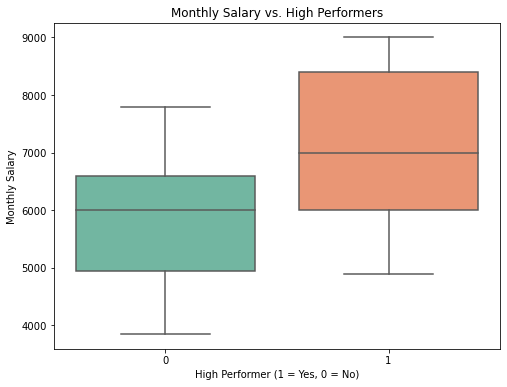

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_Performer', y='Monthly_Salary', data=df, 
palette='Set2')
plt.title("Monthly Salary vs. High Performers")
plt.xlabel("High Performer (1 = Yes, 0 = No)")
plt.ylabel("Monthly Salary")
plt.show()

In [14]:
X = df[['Performance_Score','Education_Level', 'Employee_Satisfaction_Score', 'Promotions']]
Y = df['High_Performer']
X_train, X_test, Y_train, Y_test =train_test_split(X, Y,test_size= 0.2, random_state= 42)
X_test

,Performance_Score,Education_Level,Employee_Satisfaction_Score,Promotions
75721,2,2,4.59,0
80184,4,1,4.83,1
19864,3,1,2.23,0
76699,1,2,4.88,0
92991,4,0,3.68,1
...,...,...,...,...
32595,3,1,1.57,2
29313,4,2,3.88,0
37862,2,2,1.49,0
53421,5,0,1.92,2


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Confusion Matrix:
 [[12107     0]
 [    0  7893]]


In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)
Accuracy:  1.0
prediction = lr.predict([[5, 1, 1.72, 2]])
print(prediction)

Accuracy:  1.0
[1]
